In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv("cardio_train.csv", sep = ';')

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [10]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.drop('id',axis=1,inplace=True)

df['age']=(df['age']/365).astype(int)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# EDA (Exploratery data Analysis)

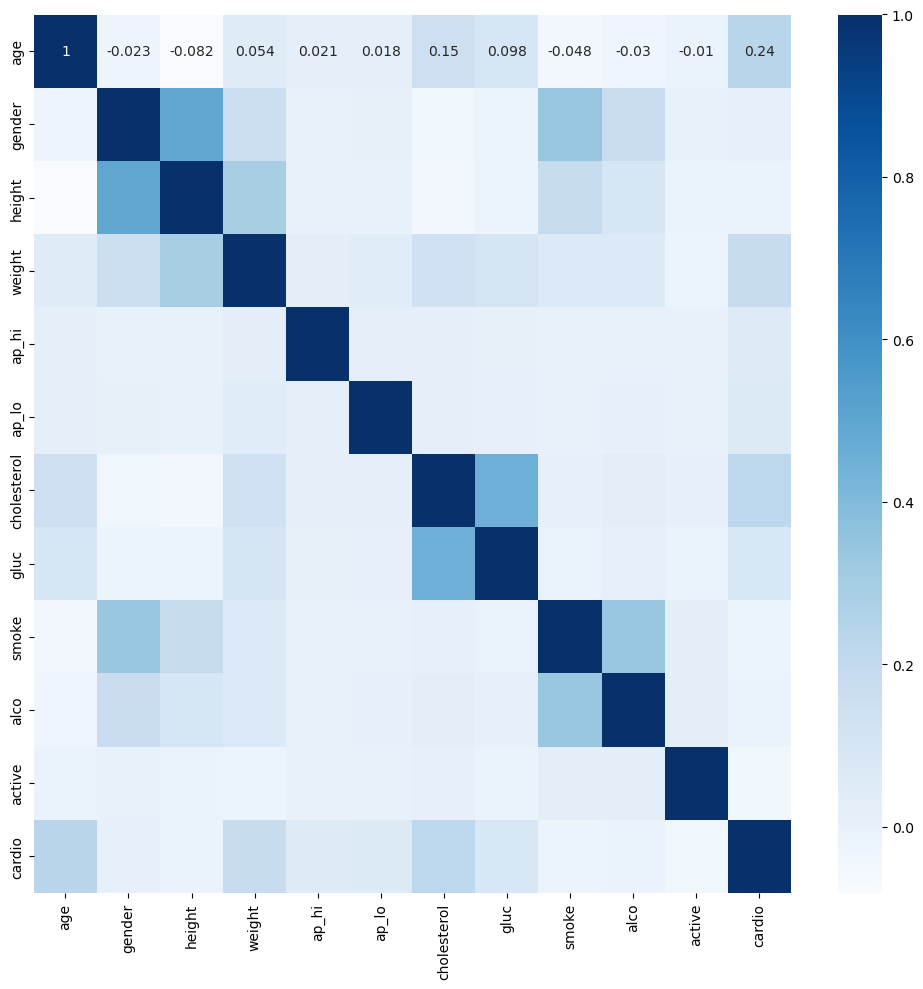

In [12]:
plt.figure(figsize=(10, 10))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.tight_layout()

In [13]:
#the risk of cardio by age
mean_cardio_by_age=df.groupby('age')['cardio'].mean()

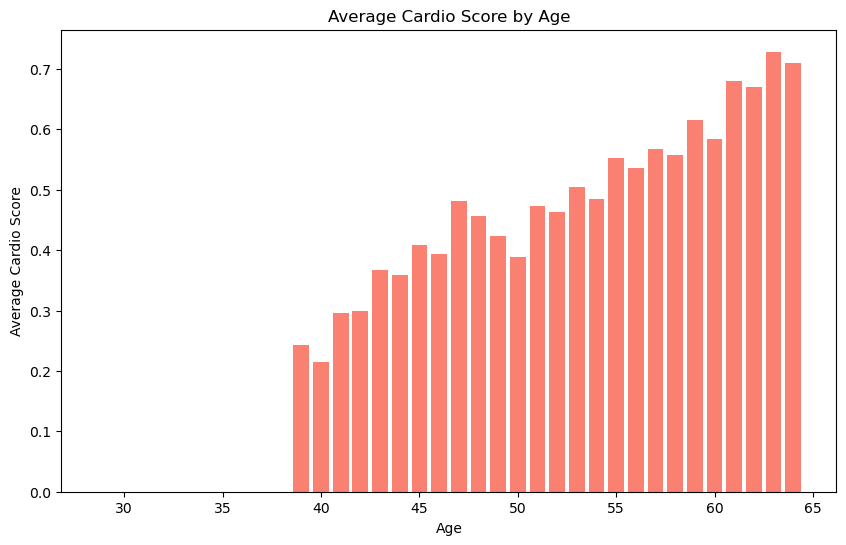

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(mean_cardio_by_age.index, mean_cardio_by_age.values,color='salmon')
plt.xlabel('Age')
plt.ylabel('Average Cardio Score')
plt.title('Average Cardio Score by Age')
plt.show()

In [15]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
1    45530
2    24470
Name: count, dtype: int64

In [16]:
df['gender'].replace({1: 'Female', 2: 'Male'}, inplace=True)
df['cardio'].replace({0:'No Cardio', 1:'With Cardio'}, inplace=True)

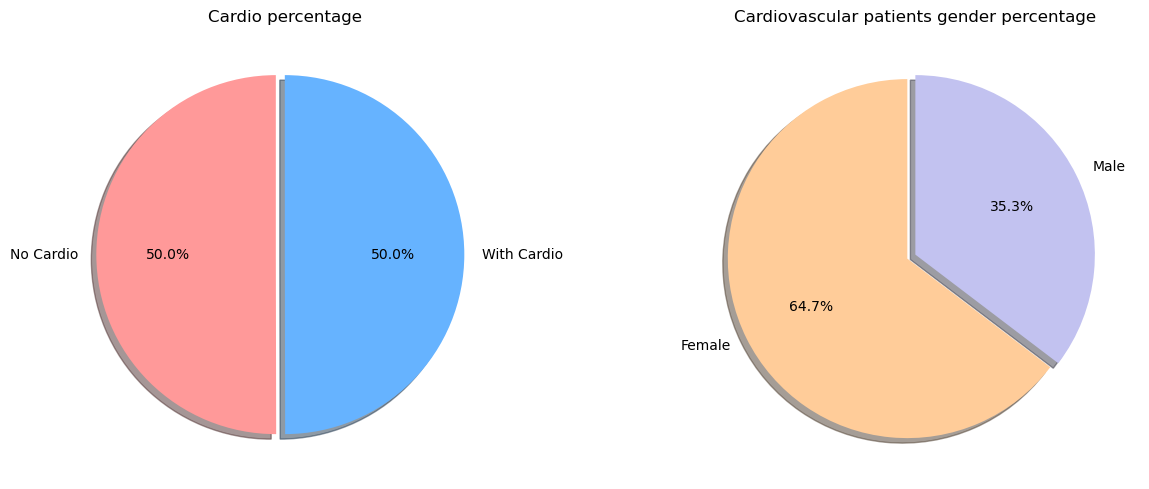

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 20))
plt.tight_layout(pad=10)

# Custom color palettes
cardio_colors = ['#ff9999', '#66b3ff']
gender_colors = ['#ffcc99', '#c2c2f0']

# Pie chart for Cardio percentage
cardio_counts = df['cardio'].value_counts()
ax[0].pie(x=cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=cardio_colors, explode=(0.05, 0.0))
ax[0].set_title('Cardio percentage')

# Pie chart for Cardiovascular patients gender percentage
gender_counts = df[df['cardio'] == 'With Cardio']['gender'].value_counts()
ax[1].pie(x=gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, colors=gender_colors, explode=(0.05, 0.0))
ax[1].set_title('Cardiovascular patients gender percentage')

plt.show()

In [18]:
df['cholesterol']=df['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal' })

In [19]:
cholesterol_counts2 = df['cholesterol'].value_counts()
cholesterol_counts2

cholesterol
normal               52385
above normal          9549
well above normal     8066
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

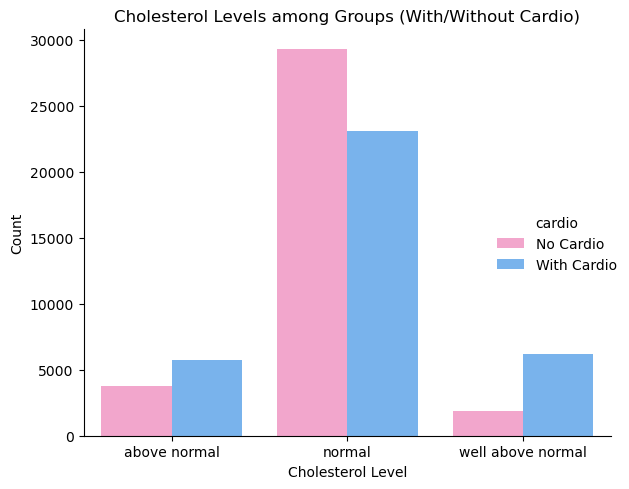

In [20]:
# Grouping data by 'cholesterol' and 'cardio' and getting counts
grouped_data = df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')

# Plotting using Seaborn
colors = ['#ff99cc', '#66b3ff']
plt.figure(figsize=(10, 6))
sns.catplot(x='cholesterol', y='count', hue='cardio',kind='bar',palette=colors, data=grouped_data)
plt.title('Cholesterol Levels among Groups (With/Without Cardio)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

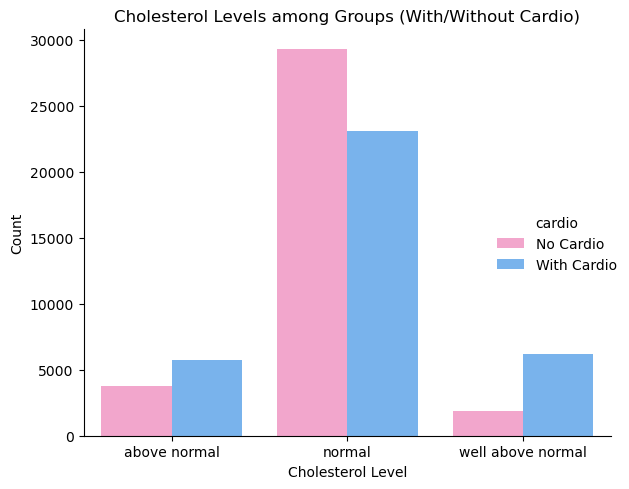

In [21]:
# Grouping data by 'cholesterol' and 'cardio' and getting counts
grouped_data = df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')

# Plotting using Seaborn
colors = ['#ff99cc', '#66b3ff']
plt.figure(figsize=(10, 6))
sns.catplot(x='cholesterol', y='count', hue='cardio',kind='bar',palette=colors, data=grouped_data)
plt.title('Cholesterol Levels among Groups (With/Without Cardio)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [22]:
df['gluc']=df['gluc'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal' })

In [23]:
pd.crosstab(df.gluc,df.cardio)


cardio,No Cardio,With Cardio
gluc,,
above normal,2112,3078
normal,30894,28585
well above normal,2015,3316


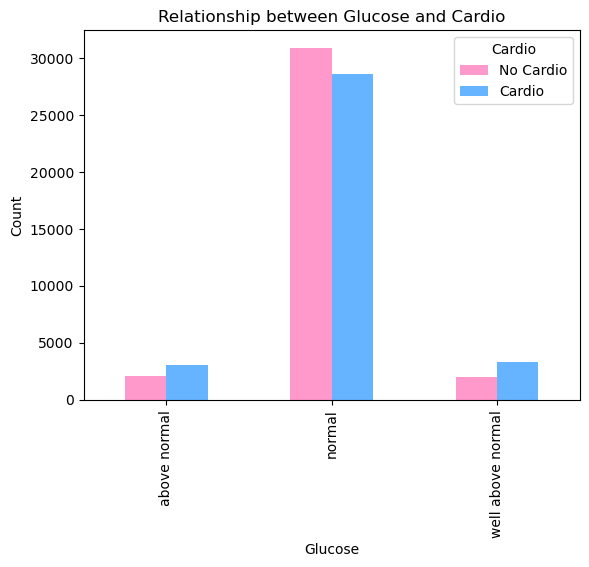

In [24]:
cross_tab = pd.crosstab(df['gluc'], df['cardio'])
cross_tab.plot(kind='bar', color=colors) 

plt.title('Relationship between Glucose and Cardio')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.legend(title='Cardio', labels=['No Cardio', 'Cardio'])

plt.show()

In [25]:
# Filter data by gender
male_data = df[df['gender'] == 'Male']
female_data = df[df['gender'] == 'Female']

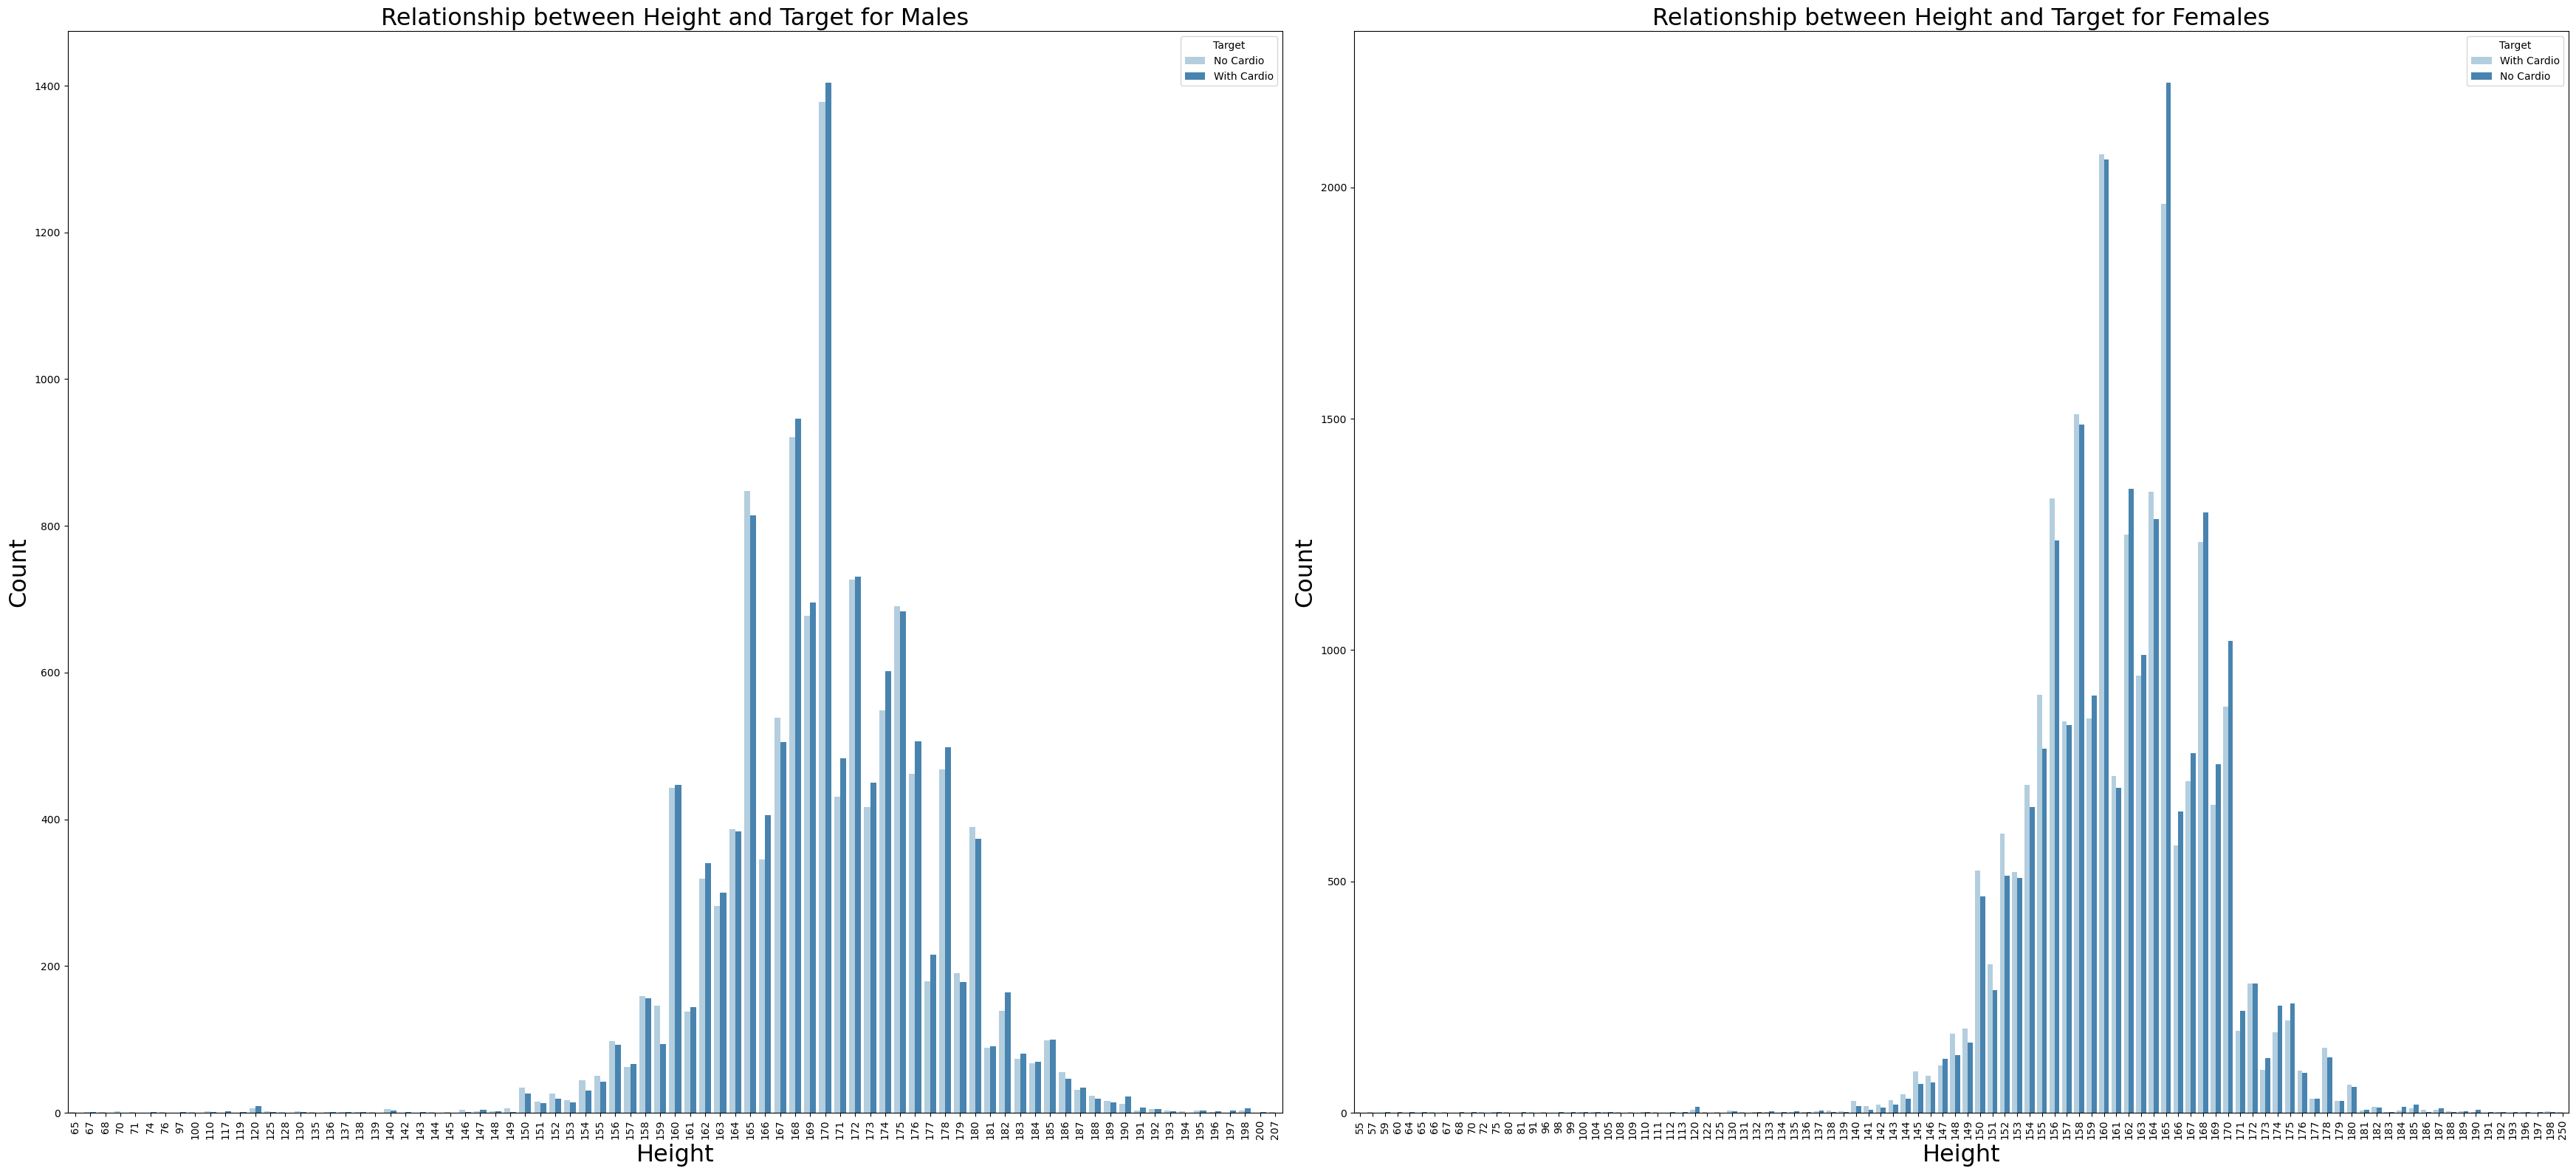

In [26]:
# Set up subplots to display plots side by side
fig, axes = plt.subplots(1, 2, figsize=(35, 16))

# Countplot for males
sns.countplot(x='height', hue='cardio', data=male_data, palette='Blues', ax=axes[0])
axes[0].set_title('Relationship between Height and Target for Males', fontsize=23)
axes[0].set_xlabel('Height', fontsize=23)
axes[0].set_ylabel('Count', fontsize=23)
axes[0].legend(title='Target')
axes[0].tick_params(axis='x', labelrotation=90)

# Countplot for females
sns.countplot(x='height', hue='cardio', data=female_data, palette='Blues', ax=axes[1])
axes[1].set_title('Relationship between Height and Target for Females', fontsize=23)
axes[1].set_xlabel('Height', fontsize=23)
axes[1].set_ylabel('Count', fontsize=23)
axes[1].legend(title='Target', loc='upper right')
axes[1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

In [27]:
pd.crosstab(df.active,df.cardio)


cardio,No Cardio,With Cardio
active,,
0,6378,7361
1,28643,27618


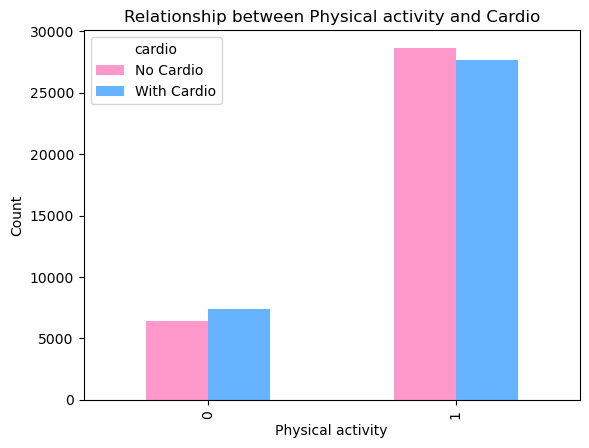

In [28]:
cross_tab = pd.crosstab(df['active'], df['cardio'])
cross_tab.plot(kind='bar', color=colors) 

plt.title('Relationship between Physical activity and Cardio')
plt.xlabel('Physical activity')
plt.ylabel('Count')

plt.show()

In [29]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'cholesterol', 'gluc'])


# Split into dependent and independent features
X = df_encoded.drop('cardio', axis=1)
y = df_encoded['cardio']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [30]:
# Apply Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression()

In [33]:
lr.fit(X_train,y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
lr.score(X_test,y_test)

0.7042857142857143

In [35]:
#  Random forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train,y_train)

print('Train Accuracy: ', rand_forest.score(X_train,y_train))
print('Test Accuracy: ', rand_forest.score(X_test,y_test))

Train Accuracy:  0.979
Test Accuracy:  0.695


In [37]:
#Hyper-parameter Tuning with GridSearchCV 
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 20]}

In [38]:
#choosing best parameters
grid_search = GridSearchCV(rand_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best Parameters: ', best_params)

Best Parameters:  {'max_depth': 10, 'n_estimators': 300}


In [40]:
best_rand_forest = RandomForestClassifier(**best_params)
best_rand_forest.fit(X_train, y_train)
print('Train Accuracy: ', best_rand_forest.score(X_train,y_train))
print('Test Accuracy: ', best_rand_forest.score(X_test,y_test))

Train Accuracy:  0.7528095238095238
Test Accuracy:  0.7242857142857143


In [41]:
#Evaluation
y_predictions = best_rand_forest.predict(X_test)

In [42]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

   No Cardio       0.70      0.79      0.74      3520
 With Cardio       0.76      0.66      0.70      3480

    accuracy                           0.72      7000
   macro avg       0.73      0.72      0.72      7000
weighted avg       0.73      0.72      0.72      7000



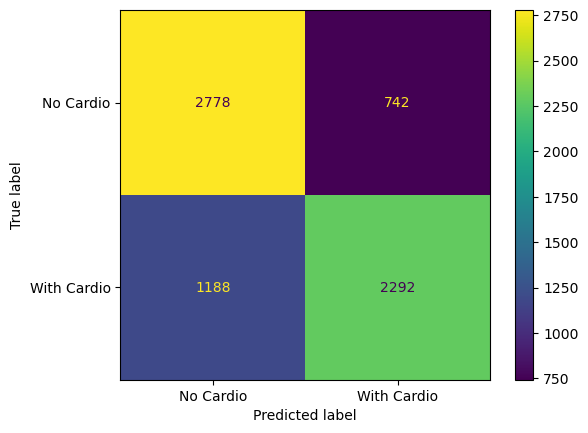

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions)
plt.show()